# ***Exploratory Data Analysis - Terrorism #TASK-4***

***Author:- PRATYAKSH AGARWAL***

***Data science and buisness analytics internship @SPARKS_FOUNDATION***

***Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. 
As a security/defense analyst, try to find out the hot zone of terrorism.***

In [3]:
#Importing important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [14]:
#reading the data file usindf.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)g pandas library
df= pd.read_csv('C:\\Users\\user\\Desktop\\Spark_task\\Task_4\\globalterrorism.csv.csv',encoding = 'ISO-8859-1')
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
df = df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [16]:
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [17]:
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [19]:
#DESTRUCTIVE FEATURES
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


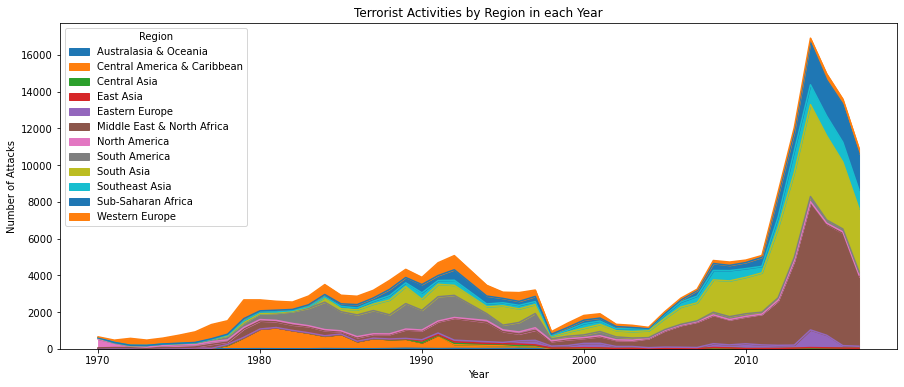

In [20]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

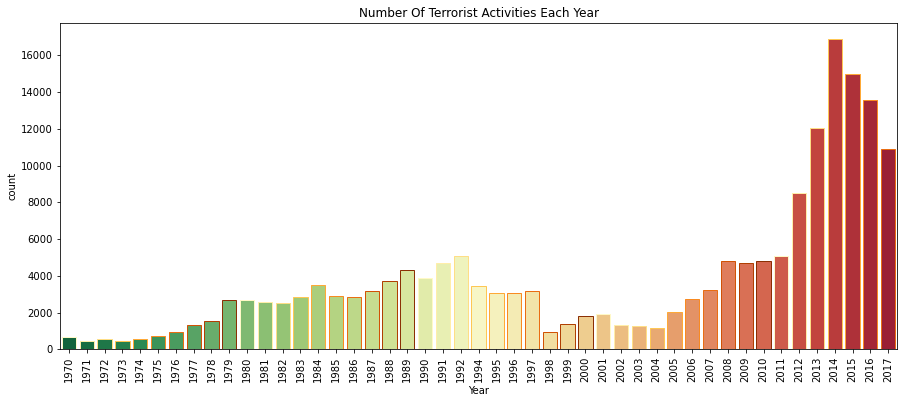

In [21]:

#Number of Terrorist Activities each Year

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [22]:
#History of the Worst Terror Attacks in Heatmap using Plotly

df['Wounded'] =df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']


In [23]:

#Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

df = df.sort_values(by='casualities',ascending=False)[:40]

In [24]:
heat=df.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [25]:
df.Country.value_counts()[:15]


Iraq             11
United States     5
Spain             4
Japan             3
Afghanistan       2
Rwanda            2
Nepal             1
Kenya             1
Ethiopia          1
Somalia           1
Iran              1
Chad              1
Russia            1
South Sudan       1
India             1
Name: Country, dtype: int64

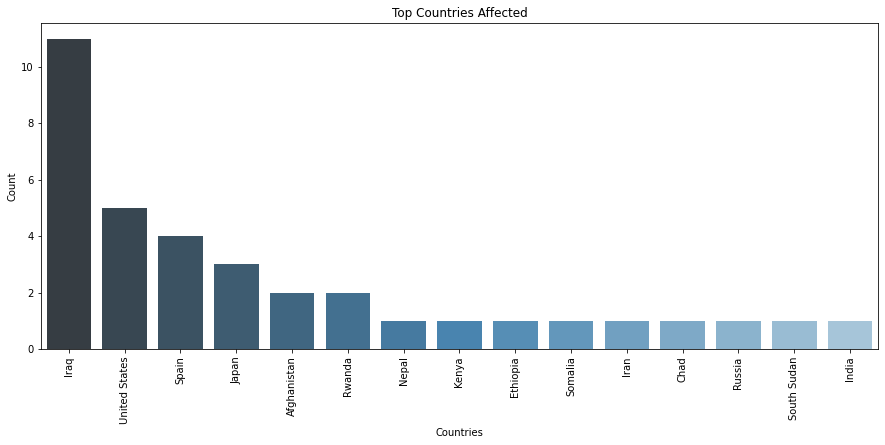

In [40]:
#Top Countries affected by Terror Attacks¶

plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [27]:
#Now to visualize the top four countries that have suffered the most using bubble charts in Plotly¶

terror_df =df[(df['Group'] != 'Unknown') & (df['casualities'] > 50)]
terror_df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
73126,2001,9,0,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,0,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,0,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,0,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,1,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [28]:
terror_df = terror_df.sort_values(['Region', 'Country'])

In [29]:
#It is best to always check for null values and drop the features that are not needed. Atleast it can execute much faster¶

terror_df.isnull().sum()

Year            0
Month           0
Extended        0
Day             0
Country         0
state           0
Region          0
city            0
latitude        0
longitude       0
AttackType      0
Killed          0
Wounded         0
Target          0
Summary         8
Group           0
Target_type     0
Weapon_type     0
Motive         13
casualities     0
dtype: int64

In [30]:
terror_df = terror_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [31]:
terror_df = terror_df.dropna(subset=['city'])

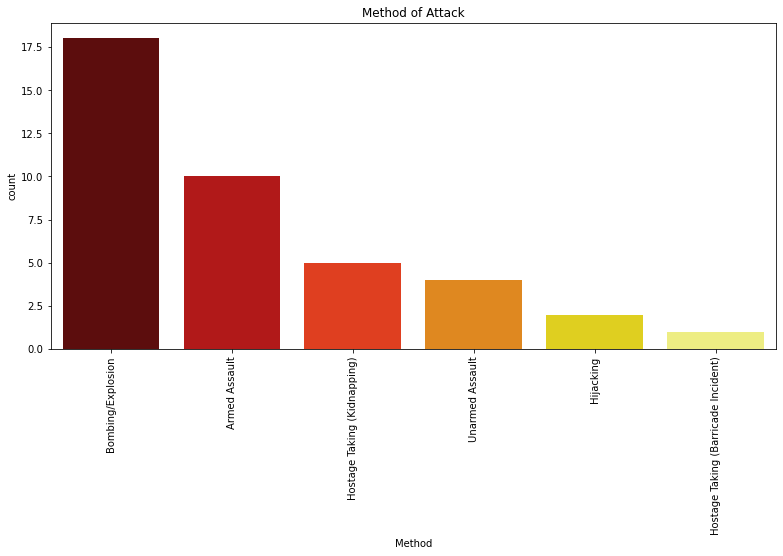

In [32]:
#Methods of attack

plt.figure(figsize=(13,6))
sns.countplot(df['AttackType'],data=df,order=df['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

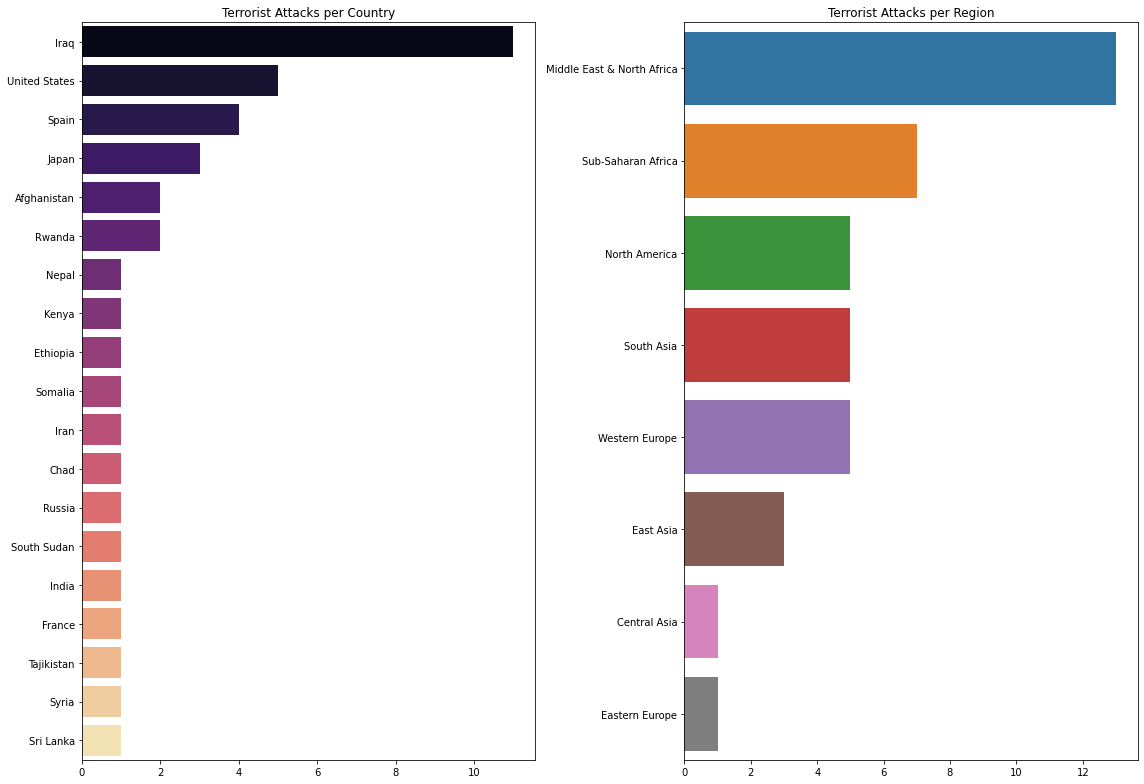

In [33]:
#Country and region

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values, y = df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

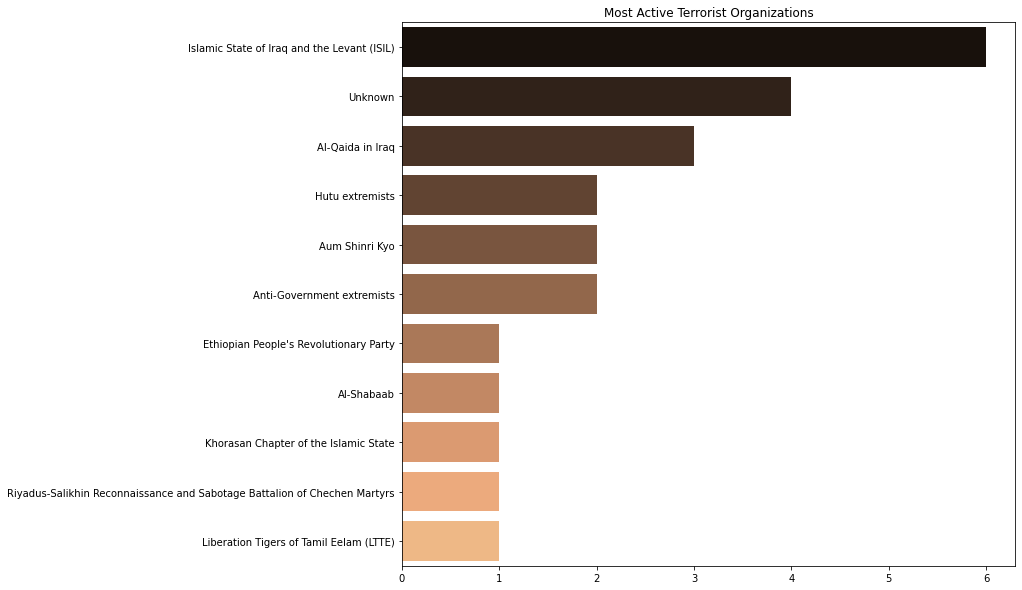

In [42]:
#Most active organizations

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

In [ ]:
#Most affected targets

plt.subplots(figsize=(15,7))
sns.barplot(y=df['Target_type'].value_counts().index,x=df['Target_type'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

In [ ]:
#Before and after the War on Terror

#After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.


df_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

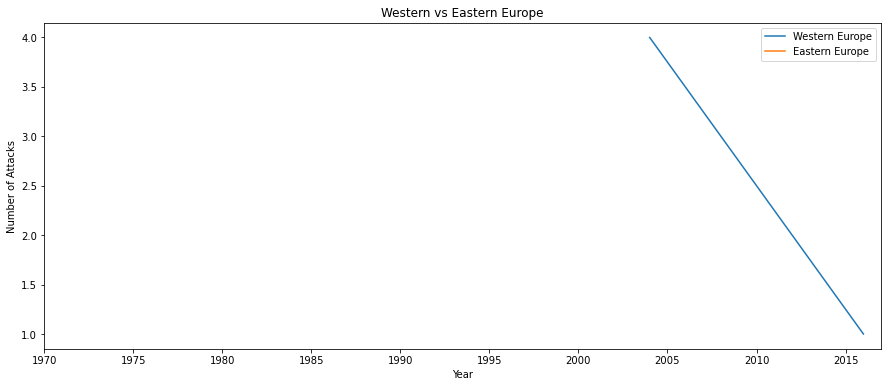

In [35]:
#The shift from Western Europe to Eastern Europe

fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
             df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
             df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()


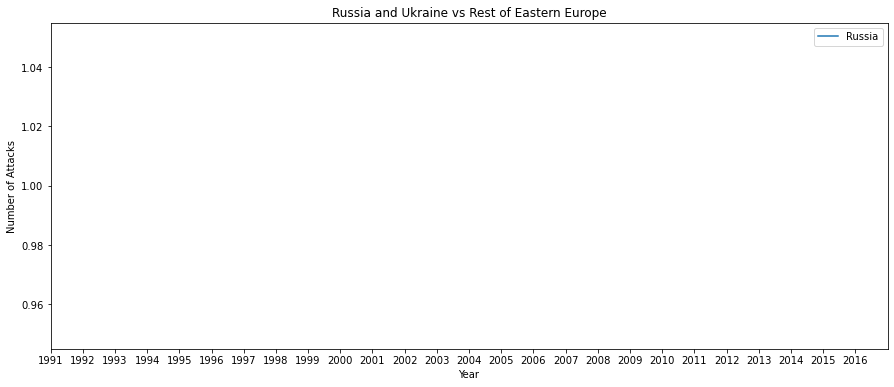

In [36]:
fig,ax = plt.subplots(figsize=(15,6))
russia = df[(df['Country']=='Russia') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
ukraine = df[(df['Country']=='Ukraine') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
rest_east = df[(df['Country']!='Russia') & (df['Country']!='Ukraine')
               & (df['Region']=='Eastern Europe')& (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

***Are extended attacks more lethal?***

***Extended attacks are defined as events that last longer than 24 hours. Does a longer timeframe mean a higher rate of casualties? Lets first look at which methods of attack tend to be extended or unextended.***

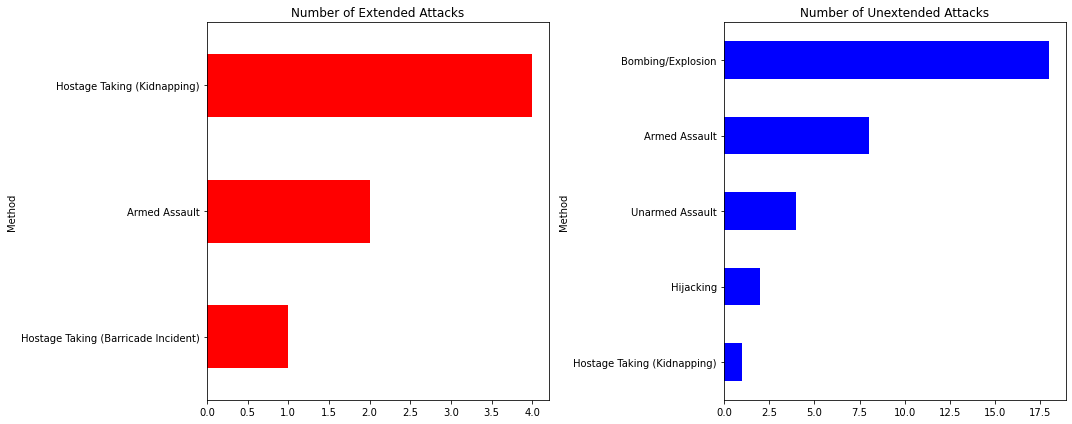

In [37]:
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=df[df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()